Classification of handwritten digits(MNIST dataset) using deep neural network.
Using TensorFlow and Keras sequential model to build the network.
Keras is a library built on tensorFlow

This is to learn how to build deep networks using tensorflow and how normalization affects loss and accuracy.

In [7]:
import numpy as np
import tensorflow as tf
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
%matplotlib inline
tf.__version__

'1.10.1'

Importing the mnist dataset from keras library. It's a dataset of hand-written digits, 0 through 9. It's 28x28 grayscale images of these hand-written digits.

In [25]:
mnist = tf.keras.datasets.mnist
(x_train, y_train),(x_test, y_test) = mnist.load_data()

So the x_train data is the "features." In this case, the features are pixel values of the 28x28 images of these digits 0-9. The y_train is the label (is it a 0,1,2,3,4,5,6,7,8 or a 9?)

The testing variants of these variables is the "out of sample" examples that I will use. These are examples from my data that I am going to set aside, reserving them for testing the model.

Neural networks are exceptionally good at fitting to data, so much so that they will commonly over-fit the data. My real hope is that the neural network doesn't just memorize the data and that it instead "generalizes" and learns the actual problem and patterns associated with it.

I am going to follow below 5 steps in the neural network model life-cycle in Keras.

1. Define Network.
2. Compile Network.
3. Fit Network.
4. Evaluate Network.
5. Make Predictions.


for more information visit site https://machinelearningmastery.com/5-step-life-cycle-neural-network-models-keras/

In [26]:
print(x_train[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

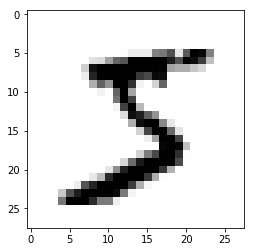

In [27]:
plt.imshow(x_train[0],cmap=plt.cm.binary)
plt.show()

In [28]:
print(y_train[0])

5


model without normalized input

In [40]:
model_un = tf.keras.models.Sequential()
model_un.add(tf.keras.layers.Flatten())
model_un.add(tf.keras.layers.Dense(60, activation=tf.nn.relu))
model_un.add(tf.keras.layers.Dense(60, activation=tf.nn.relu))
model_un.add(tf.keras.layers.Dense(10, activation=tf.nn.softmax))
model_un.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model_un.fit(x_train, y_train, epochs=15)

Epoch 1/15
60000/60000 [==============================] - 6s 92us/step - loss: 8.0796 - acc: 0.4945
Epoch 2/15
60000/60000 [==============================] - 5s 76us/step - loss: 6.0832 - acc: 0.6203
Epoch 3/15
60000/60000 [==============================] - 5s 76us/step - loss: 5.8642 - acc: 0.6347
Epoch 4/15
60000/60000 [==============================] - 5s 75us/step - loss: 5.3799 - acc: 0.6648
Epoch 5/15
60000/60000 [==============================] - 5s 75us/step - loss: 4.3610 - acc: 0.7282
Epoch 6/15
60000/60000 [==============================] - 5s 81us/step - loss: 4.3597 - acc: 0.7286
Epoch 7/15
60000/60000 [==============================] - 5s 77us/step - loss: 4.2392 - acc: 0.7362
Epoch 8/15
60000/60000 [==============================] - 5s 77us/step - loss: 4.3184 - acc: 0.7314
Epoch 9/15
60000/60000 [==============================] - 5s 76us/step - loss: 4.2301 - acc: 0.7370
Epoch 10/15
60000/60000 [==============================] - 5s 77us/step - loss: 4.1753 - acc: 0.7404

In [41]:
val_loss, val_acc = model_un.evaluate(x_test, y_test)
print(val_loss)
print(val_acc)

10000/10000 [==============================] - 1s 59us/step
4.23562484703064
0.7367


In [42]:
predictions = model_un.predict(x_test)
print(predictions)

[[0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


6


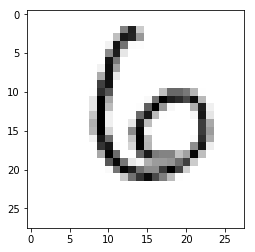

In [43]:
print(np.argmax(predictions[100]))
plt.imshow(x_test[100],cmap=plt.cm.binary)
plt.show()

model with normalized input

In [10]:
x_train = tf.keras.utils.normalize(x_train, axis=1)
x_test = tf.keras.utils.normalize(x_test, axis=1)

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

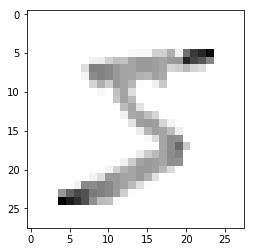

In [11]:
print(x_train[0])

plt.imshow(x_train[0],cmap=plt.cm.binary)
plt.show()

In [12]:
model = tf.keras.models.Sequential()

In [13]:
model.add(tf.keras.layers.Flatten())

In [15]:
model.add(tf.keras.layers.Dense(121, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(121, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(10, activation=tf.nn.softmax))
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [18]:
model.fit(x_train, y_train, epochs=5)

Epoch 1/5
60000/60000 [==============================] - 6s 106us/step - loss: 0.0187 - acc: 0.9941
Epoch 2/5
60000/60000 [==============================] - 6s 107us/step - loss: 0.0179 - acc: 0.9941
Epoch 3/5
60000/60000 [==============================] - 6s 104us/step - loss: 0.0139 - acc: 0.9951
Epoch 4/5
60000/60000 [==============================] - 6s 104us/step - loss: 0.0174 - acc: 0.9943
Epoch 5/5
60000/60000 [==============================] - 6s 105us/step - loss: 0.0128 - acc: 0.9959


In [19]:
val_loss, val_acc = model.evaluate(x_test, y_test)
print(val_loss)
print(val_acc)

10000/10000 [==============================] - 0s 35us/step
0.12620746227069177
0.9736


In [20]:
predictions = model.predict(x_test)
print(predictions)

[[3.13712359e-12 2.04454995e-11 1.94998656e-10 ... 1.00000000e+00
  7.49078317e-12 5.29016511e-08]
 [1.62434251e-16 7.51144702e-11 1.00000000e+00 ... 3.69179513e-14
  4.21029770e-17 6.02239764e-17]
 [2.92696877e-14 9.99999881e-01 4.08579215e-09 ... 1.80878125e-11
  9.30450668e-08 5.98348281e-12]
 ...
 [1.27515066e-16 4.69163553e-13 1.08331963e-12 ... 2.30172164e-13
  4.05295459e-12 7.17375048e-11]
 [1.18666447e-15 1.48857388e-17 4.68573422e-20 ... 2.13315404e-17
  5.24195513e-11 1.27465952e-16]
 [3.02947792e-16 3.38061801e-17 1.88412450e-18 ... 1.02016704e-22
  1.39058741e-13 5.26534950e-16]]


6


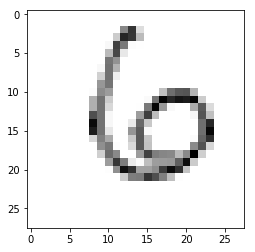

In [23]:
print(np.argmax(predictions[100]))
plt.imshow(x_test[100],cmap=plt.cm.binary)
plt.show()

Conclusion:

We observed that loss is less when we use normalized input. The neurons learns better when the input is normalized.